In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import MSTL
from IPython.display import display
import statsmodels.tsa.stattools as stattools

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# Read Data

In [2]:
store = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
sales = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
store.head()
features.head()
sales.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Lets check, CPI, Unemployment, temperature and is there any relation on sales 

Text(0.5, 1.0, 'CPI')

Text(0.5, 1.0, 'Unemployment')

Text(0.5, 1.0, 'Temperature')

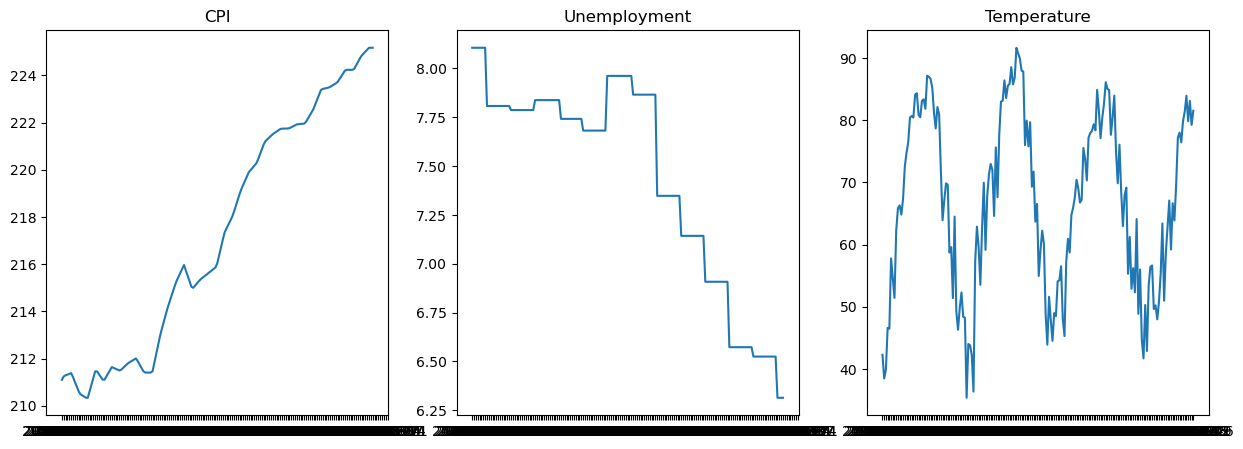

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(features.Date[features.Store==1], features.CPI[features.Store==1])
axes[0].set_title('CPI')

axes[1].plot(features.Date[features.Store==1], features.Unemployment[features.Store==1])
axes[1].set_title('Unemployment')

axes[2].plot(features.Date[features.Store==1], features.Temperature[features.Store==1])
axes[2].set_title('Temperature')

plt.show()


In [5]:
storeMappings = {}
for storeNumber in sales.Store.unique():
    df = pd.DataFrame()
    storeData = sales[sales.Store == storeNumber]
    
    for deptNumber in storeData.Dept.unique():
        weeklySales = storeData[(storeData.Dept == deptNumber) & (storeData.IsHoliday == False)].Weekly_Sales.values
        if(len(weeklySales)==133):
            df[str(deptNumber)] = weeklySales
    storeMappings[storeNumber] = df

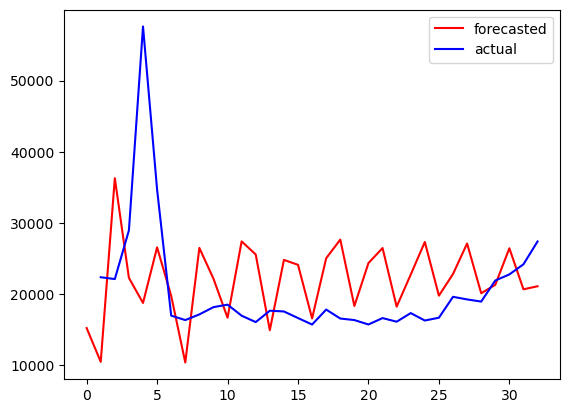

In [11]:
ar_model = sm.tsa.AutoReg(storeMappings[1]['1'][0:100], lags=15)
ar_result = ar_model.fit() 
forecast = ar_result.predict(start=101, end=133)

plt.plot(list(range(0, 33)), forecast, color='red', label='forecasted')
plt.plot(list(range(1,33)), storeMappings[1]['1'][101:], color='blue', label='actual')
plt.legend()
plt.show()

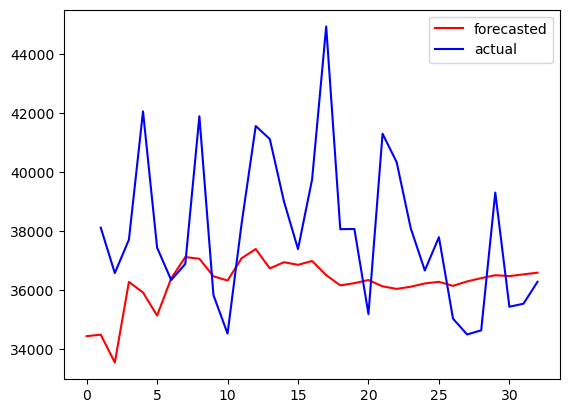

In [12]:
ar_model = sm.tsa.AutoReg(storeMappings[1]['4'][0:100], lags=15)
ar_result = ar_model.fit() 
forecast = ar_result.predict(start=101, end=133)

plt.plot(list(range(0, 33)), forecast, color='red', label='forecasted')
plt.plot(list(range(1,33)), storeMappings[1]['4'][101:], color='blue', label='actual')
plt.legend()
plt.show()

/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


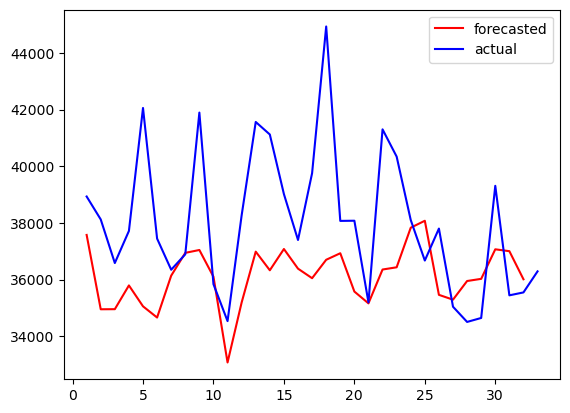

In [13]:
model = ARIMA(storeMappings[1]['4'][0:100], order=(15, 0, 10))  
fit_model = model.fit()

forecast = fit_model.forecast(steps=32)  
plt.plot(list(range(1, 33)), forecast, color='red', label='forecasted')
plt.plot(list(range(1,34)), storeMappings[1]['4'][100:], color='blue', label='actual')
plt.legend()
plt.show()

/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


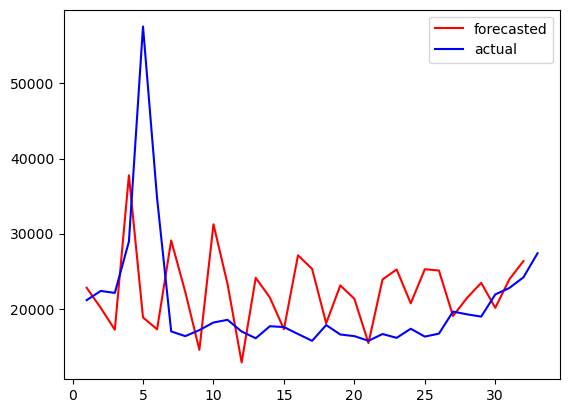

In [14]:
model = ARIMA(storeMappings[1]['1'][0:100], order=(15, 0, 10))  
fit_model = model.fit()

forecast = fit_model.forecast(steps=32)  
plt.plot(list(range(1, 33)), forecast, color='red', label='forecasted')
plt.plot(list(range(1,34)), storeMappings[1]['1'][100:], color='blue', label='actual')
plt.legend()
plt.show()